<a href="https://colab.research.google.com/github/v1n99/spotify-music-analysis/blob/main/3120Spotify_API.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Analyzing top tracks for: Taylor Swift
Analyzing top tracks for: Drake
Analyzing top tracks for: Ariana Grande
Analyzing top tracks for: Ed Sheeran
Analyzing top tracks for: Beyoncé
Analyzing top tracks for: The Weeknd
Analyzing top tracks for: Justin Bieber
Analyzing top tracks for: Billie Eilish
Analyzing top tracks for: Post Malone
Analyzing top tracks for: Harry Styles
Summary Statistics:
              popularity         duration_min
                    mean min max         mean
artist                                       
Ariana Grande       83.0  79  90         3.30
Beyoncé             69.2  62  77         3.99
Billie Eilish       85.4  72  97         3.77
Drake               79.7  77  85         3.62
Ed Sheeran          76.8  65  86         3.89
Harry Styles        78.3  72  87         3.80
Justin Bieber       78.8  56  85         3.29
Post Malone         79.8  74  84         3.37
Taylor Swift        81.3  69  89         3.79
The Weeknd          85.7  82  92         3.80


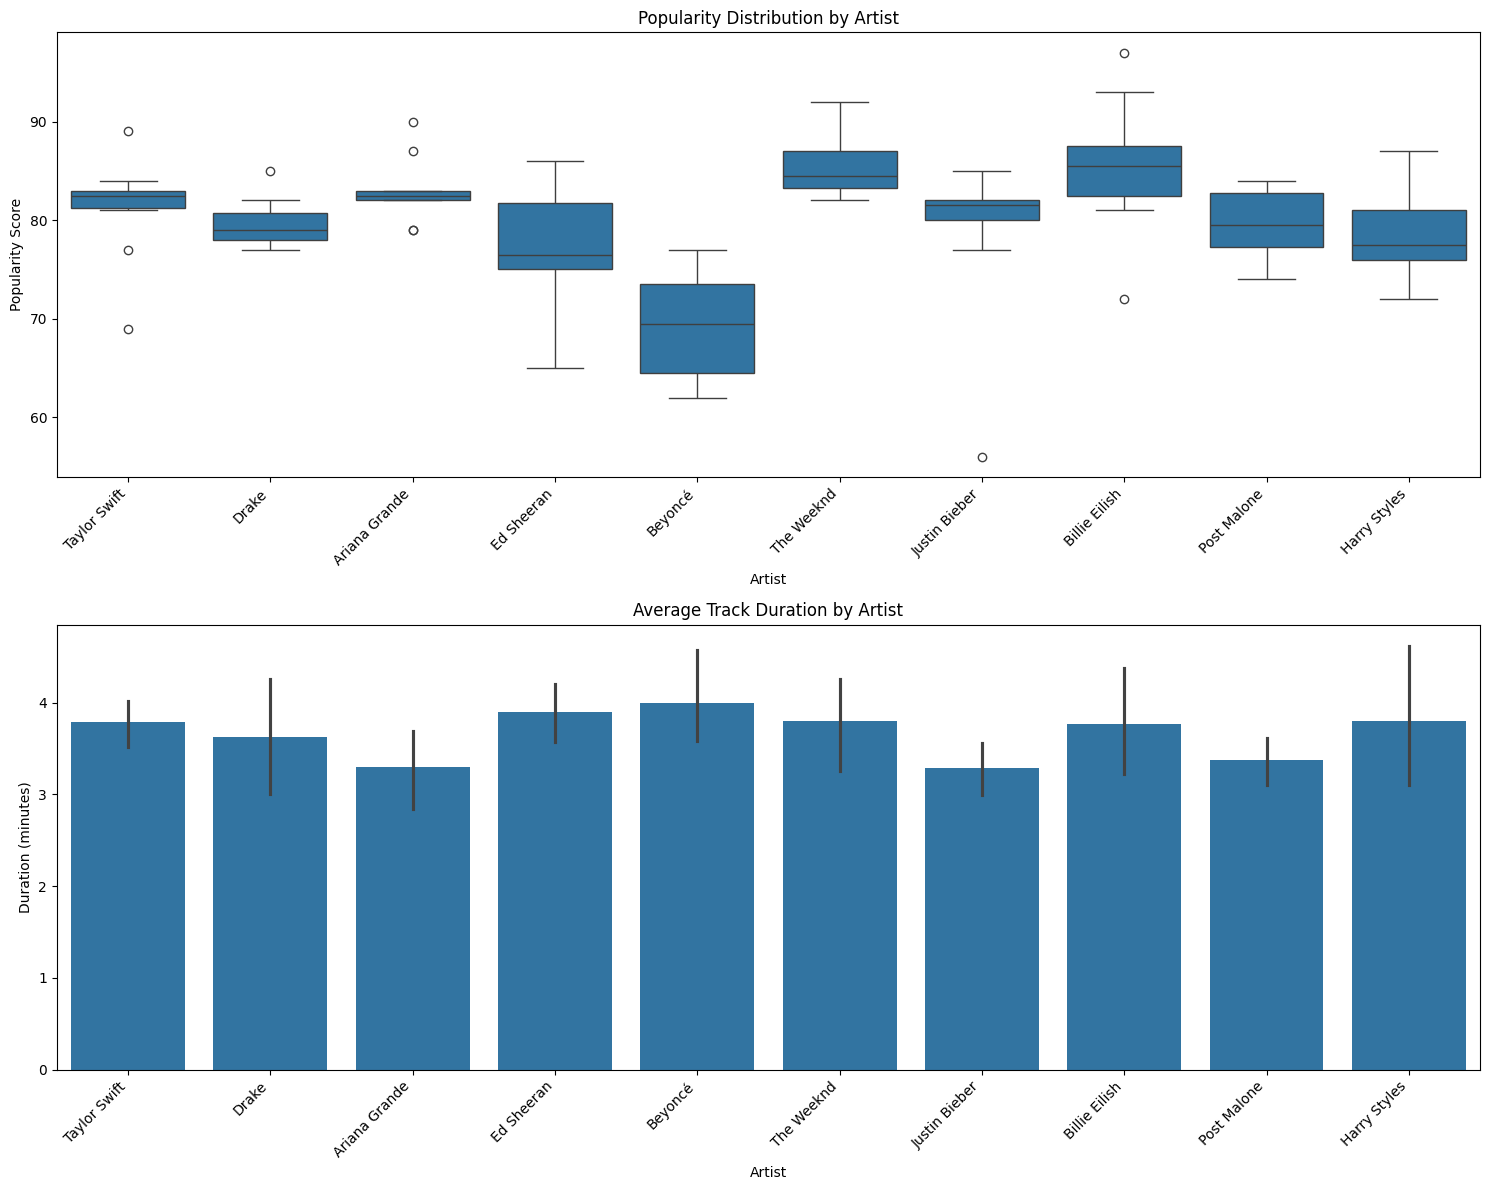

Top Tracks by Popularity for Each Artist:
Taylor Swift:
                            name  popularity  release_year
0                   Cruel Summer          89          2019
1  Fortnight (feat. Post Malone)          84          2024
3                         august          83          2020
Drake:
                               name  popularity  release_year
10                        One Dance          85          2016
11  WAIT FOR U (feat. Drake & Tems)          82          2022
12                       God's Plan          81          2018
Ariana Grande:
                                        name  popularity  release_year
20                             Santa Tell Me          90          2014
21  we can't be friends (wait for your love)          87          2024
22                                   Popular          83          2024
Ed Sheeran:
            name  popularity  release_year
30  Shape of You          86          2017
31       Perfect          86          2017
33       Shiv

In [ ]:
# Analyze top tracks for the top 10 artists with improved date handling
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

class SpotifyAnalyzer:
    def __init__(self, client_id, client_secret):
        self.auth_manager = SpotifyClientCredentials(
            client_id=client_id,
            client_secret=client_secret
        )
        self.sp = spotipy.Spotify(auth_manager=self.auth_manager)
        self.data = None

    def get_artist_top_tracks(self, artist_name):
        try:
            results = self.sp.search(q=artist_name, type='artist', limit=1)
            if not results['artists']['items']:
                print(f"No artist found for: {artist_name}")
                return None

            artist = results['artists']['items'][0]
            print(f"Analyzing top tracks for: {artist['name']}")

            top_tracks = self.sp.artist_top_tracks(artist['id'])

            tracks_data = []
            for track in top_tracks['tracks']:
                # Extract year from release date string
                release_date = track['album']['release_date']
                try:
                    if len(release_date) >= 4:  # Make sure we at least have a year
                        release_year = int(release_date[:4])
                    else:
                        release_year = None
                except:
                    release_year = None

                track_data = {
                    'artist': artist['name'],
                    'name': track['name'],
                    'popularity': track['popularity'],
                    'album': track['album']['name'],
                    'release_year': release_year,
                    'duration_min': track['duration_ms'] / 60000  # Convert to minutes directly
                }
                tracks_data.append(track_data)

            return pd.DataFrame(tracks_data)

        except Exception as e:
            print(f"Error getting artist top tracks: {str(e)}")
            return None

# Initialize analyzer
client_id = '5e1980fc0d6b40fbb830d89e653504e9'
client_secret = '3c945a1e48d849bd9b1ed0bf6d4a77e4'

analyzer = SpotifyAnalyzer(client_id, client_secret)

# List of top 10 artists
top_artists = [
    "Taylor Swift", "Drake", "Ariana Grande", "Ed Sheeran", "Beyoncé",
    "The Weeknd", "Justin Bieber", "Billie Eilish", "Post Malone", "Harry Styles"
]

# Collect data for all artists
all_data = []
for artist in top_artists:
    artist_data = analyzer.get_artist_top_tracks(artist)
    if artist_data is not None:
        all_data.append(artist_data)

# Combine all data into a single DataFrame
if all_data:
    combined_data = pd.concat(all_data, ignore_index=True)

    # Save combined data to a CSV file
    combined_data.to_csv("top_10_artists_tracks.csv", index=False)

    # Print summary statistics
    print("\
Summary Statistics:")
    print(combined_data.groupby('artist').agg({
        'popularity': ['mean', 'min', 'max'],
        'duration_min': 'mean'
    }).round(2))

    # Create visualizations
    plt.figure(figsize=(15, 12))

    # 1. Popularity Distribution by Artist
    plt.subplot(2, 1, 1)
    sns.boxplot(data=combined_data, x='artist', y='popularity')
    plt.xticks(rotation=45, ha='right')
    plt.title('Popularity Distribution by Artist')
    plt.xlabel('Artist')
    plt.ylabel('Popularity Score')

    # 2. Average Track Duration by Artist
    plt.subplot(2, 1, 2)
    sns.barplot(data=combined_data, x='artist', y='duration_min', estimator='mean')
    plt.xticks(rotation=45, ha='right')
    plt.title('Average Track Duration by Artist')
    plt.xlabel('Artist')
    plt.ylabel('Duration (minutes)')

    plt.tight_layout()
    plt.show()

    # Print top tracks for each artist
    print("\
Top Tracks by Popularity for Each Artist:")
    for artist in top_artists:
        artist_tracks = combined_data[combined_data['artist'] == artist].sort_values('popularity', ascending=False)
        if not artist_tracks.empty:
            print(f"\
{artist}:")
            print(artist_tracks[['name', 'popularity', 'release_year']].head(3))

else:
    print("No data collected for the top 10 artists.")

Analyzing top tracks for: Taylor Swift
Analyzing top tracks for: Drake
Analyzing top tracks for: Ariana Grande
Analyzing top tracks for: Ed Sheeran
Analyzing top tracks for: Beyoncé
Analyzing top tracks for: The Weeknd
Analyzing top tracks for: Justin Bieber
Analyzing top tracks for: Billie Eilish
Analyzing top tracks for: Post Malone
Analyzing top tracks for: Harry Styles
Summary Statistics:
               total_streams  avg_daily_streams
artist                                         
Ariana Grande     83000000.0         1087384.15
Beyoncé           69200000.0           46283.37
Billie Eilish     85400000.0          380323.84
Drake             79700000.0          208945.77
Ed Sheeran        76800000.0          165157.75
Harry Styles      78300000.0           57776.53
Justin Bieber     78800000.0           33496.11
Post Malone       79800000.0          271572.73
Taylor Swift      81300000.0          138097.05
The Weeknd        85700000.0          477148.30


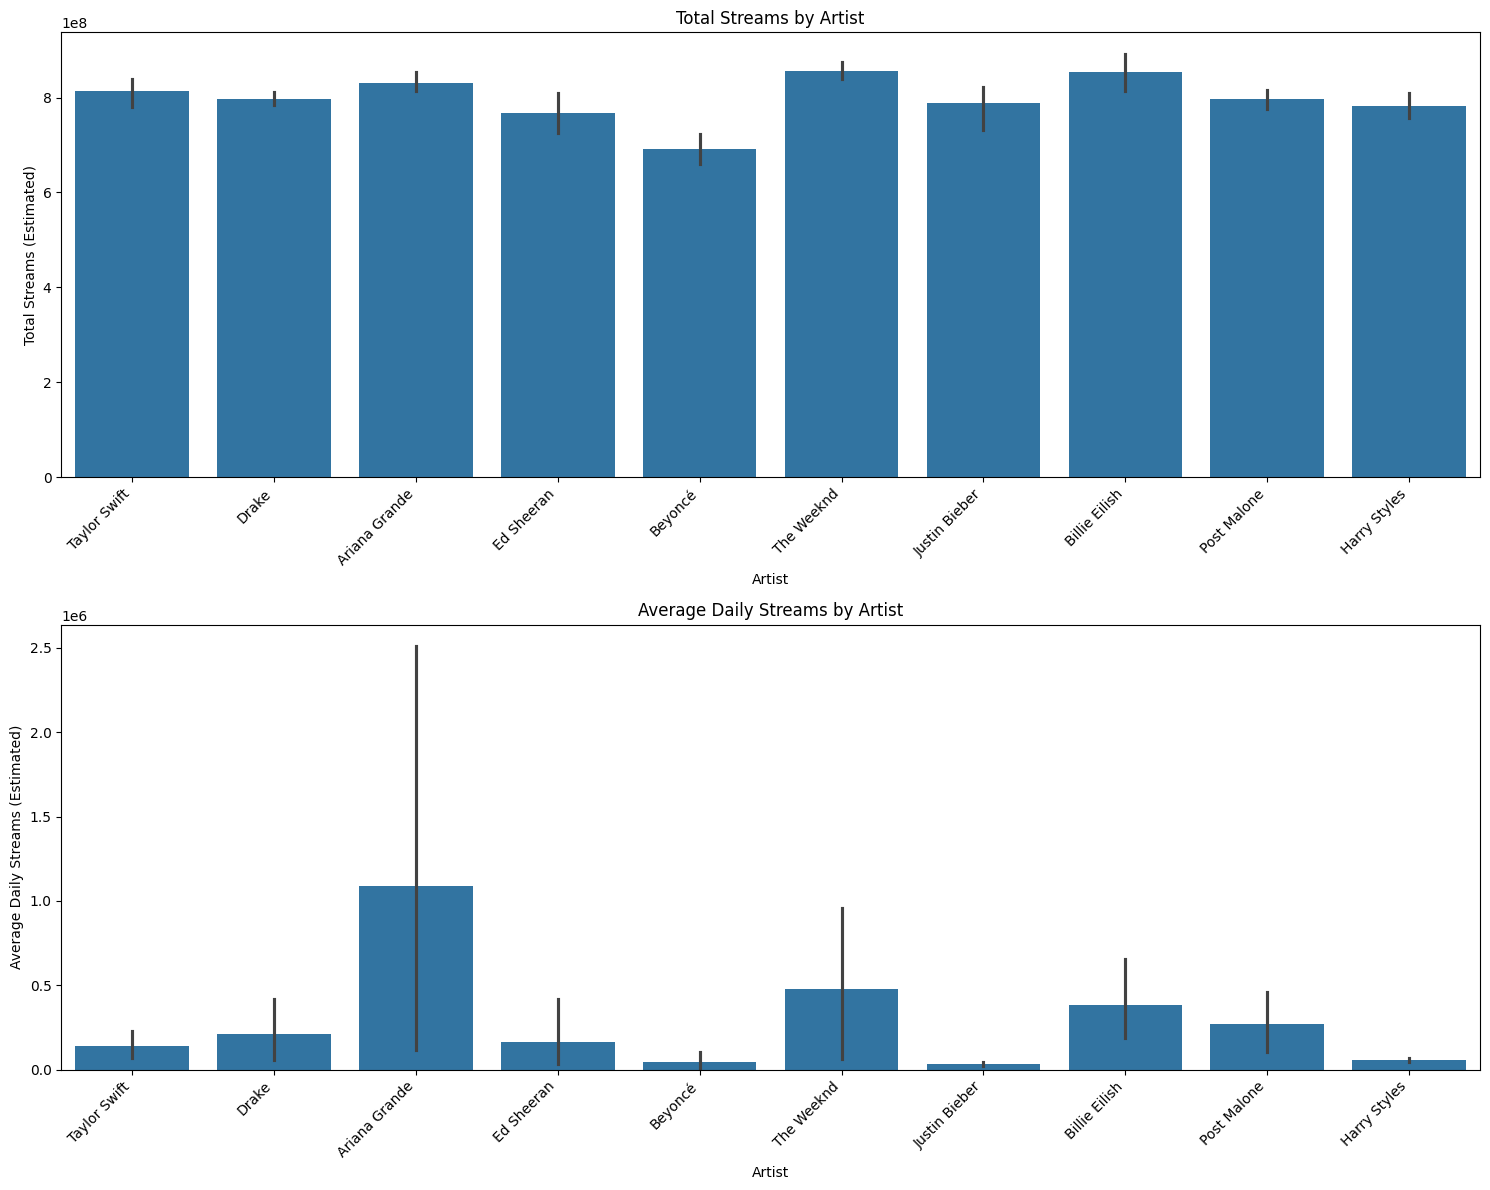

Top Tracks by Total Streams for Each Artist:
Taylor Swift:
                            name  total_streams  avg_daily_streams
0                   Cruel Summer       89000000       45994.832041
1  Fortnight (feat. Post Malone)       84000000      357446.808511
3                         august       83000000       51907.442151
Drake:
                               name  total_streams  avg_daily_streams
10                        One Dance       85000000       27078.687480
11  WAIT FOR U (feat. Drake & Tems)       82000000       85863.874346
12                       God's Plan       81000000       34394.904459
Ariana Grande:
                                        name  total_streams  avg_daily_streams
20                             Santa Tell Me       90000000       2.453653e+04
21  we can't be friends (wait for your love)       87000000       3.152174e+05
22                                   Popular       83000000       4.882353e+06
Ed Sheeran:
            name  total_streams  avg_daily_

In [ ]:
# Analyze top tracks for the top 10 artists with additional metrics
import spotipy
from spotipy.oauth2 import SpotifyClientCredentials
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

class SpotifyAnalyzer:
    def __init__(self, client_id, client_secret):
        self.auth_manager = SpotifyClientCredentials(
            client_id=client_id,
            client_secret=client_secret
        )
        self.sp = spotipy.Spotify(auth_manager=self.auth_manager)
        self.data = None

    def get_artist_top_tracks(self, artist_name):
        try:
            results = self.sp.search(q=artist_name, type='artist', limit=1)
            if not results['artists']['items']:
                print(f"No artist found for: {artist_name}")
                return None

            artist = results['artists']['items'][0]
            print(f"Analyzing top tracks for: {artist['name']}")

            top_tracks = self.sp.artist_top_tracks(artist['id'])

            tracks_data = []
            for track in top_tracks['tracks']:
                # Extract year from release date string
                release_date = track['album']['release_date']
                try:
                    release_date_obj = datetime.strptime(release_date, '%Y-%m-%d')
                except:
                    release_date_obj = None

                # Calculate days since release
                if release_date_obj:
                    days_since_release = (datetime.now() - release_date_obj).days
                else:
                    days_since_release = None

                # Estimate total streams using popularity as a proxy (scaled by 1M for demonstration)
                total_streams = track['popularity'] * 1_000_000

                # Calculate average daily streams
                if days_since_release and days_since_release > 0:
                    avg_daily_streams = total_streams / days_since_release
                else:
                    avg_daily_streams = None

                track_data = {
                    'artist': artist['name'],
                    'name': track['name'],
                    'popularity': track['popularity'],
                    'album': track['album']['name'],
                    'release_date': release_date,
                    'days_since_release': days_since_release,
                    'total_streams': total_streams,
                    'avg_daily_streams': avg_daily_streams
                }
                tracks_data.append(track_data)

            return pd.DataFrame(tracks_data)

        except Exception as e:
            print(f"Error getting artist top tracks: {str(e)}")
            return None

# Initialize analyzer
client_id = '5e1980fc0d6b40fbb830d89e653504e9'
client_secret = '3c945a1e48d849bd9b1ed0bf6d4a77e4'

analyzer = SpotifyAnalyzer(client_id, client_secret)

# List of top 10 artists
top_artists = [
    "Taylor Swift", "Drake", "Ariana Grande", "Ed Sheeran", "Beyoncé",
    "The Weeknd", "Justin Bieber", "Billie Eilish", "Post Malone", "Harry Styles"
]

# Collect data for all artists
all_data = []
for artist in top_artists:
    artist_data = analyzer.get_artist_top_tracks(artist)
    if artist_data is not None:
        all_data.append(artist_data)

# Combine all data into a single DataFrame
if all_data:
    combined_data = pd.concat(all_data, ignore_index=True)

    # Save combined data to a CSV file
    combined_data.to_csv("top_10_artists_tracks_with_metrics.csv", index=False)

    # Print summary statistics
    print("\
Summary Statistics:")
    print(combined_data[['artist', 'total_streams', 'avg_daily_streams']].groupby('artist').mean().round(2))

    # Create visualizations
    plt.figure(figsize=(15, 12))

    # 1. Total Streams by Artist
    plt.subplot(2, 1, 1)
    sns.barplot(data=combined_data, x='artist', y='total_streams', estimator='sum')
    plt.xticks(rotation=45, ha='right')
    plt.title('Total Streams by Artist')
    plt.xlabel('Artist')
    plt.ylabel('Total Streams (Estimated)')

    # 2. Average Daily Streams by Artist
    plt.subplot(2, 1, 2)
    sns.barplot(data=combined_data, x='artist', y='avg_daily_streams', estimator='mean')
    plt.xticks(rotation=45, ha='right')
    plt.title('Average Daily Streams by Artist')
    plt.xlabel('Artist')
    plt.ylabel('Average Daily Streams (Estimated)')

    plt.tight_layout()
    plt.show()

    # Print top tracks for each artist
    print("\
Top Tracks by Total Streams for Each Artist:")
    for artist in top_artists:
        artist_tracks = combined_data[combined_data['artist'] == artist].sort_values('total_streams', ascending=False)
        if not artist_tracks.empty:
            print(f"\
{artist}:")
            print(artist_tracks[['name', 'total_streams', 'avg_daily_streams']].head(3))

else:
    print("No data collected for the top 10 artists.")

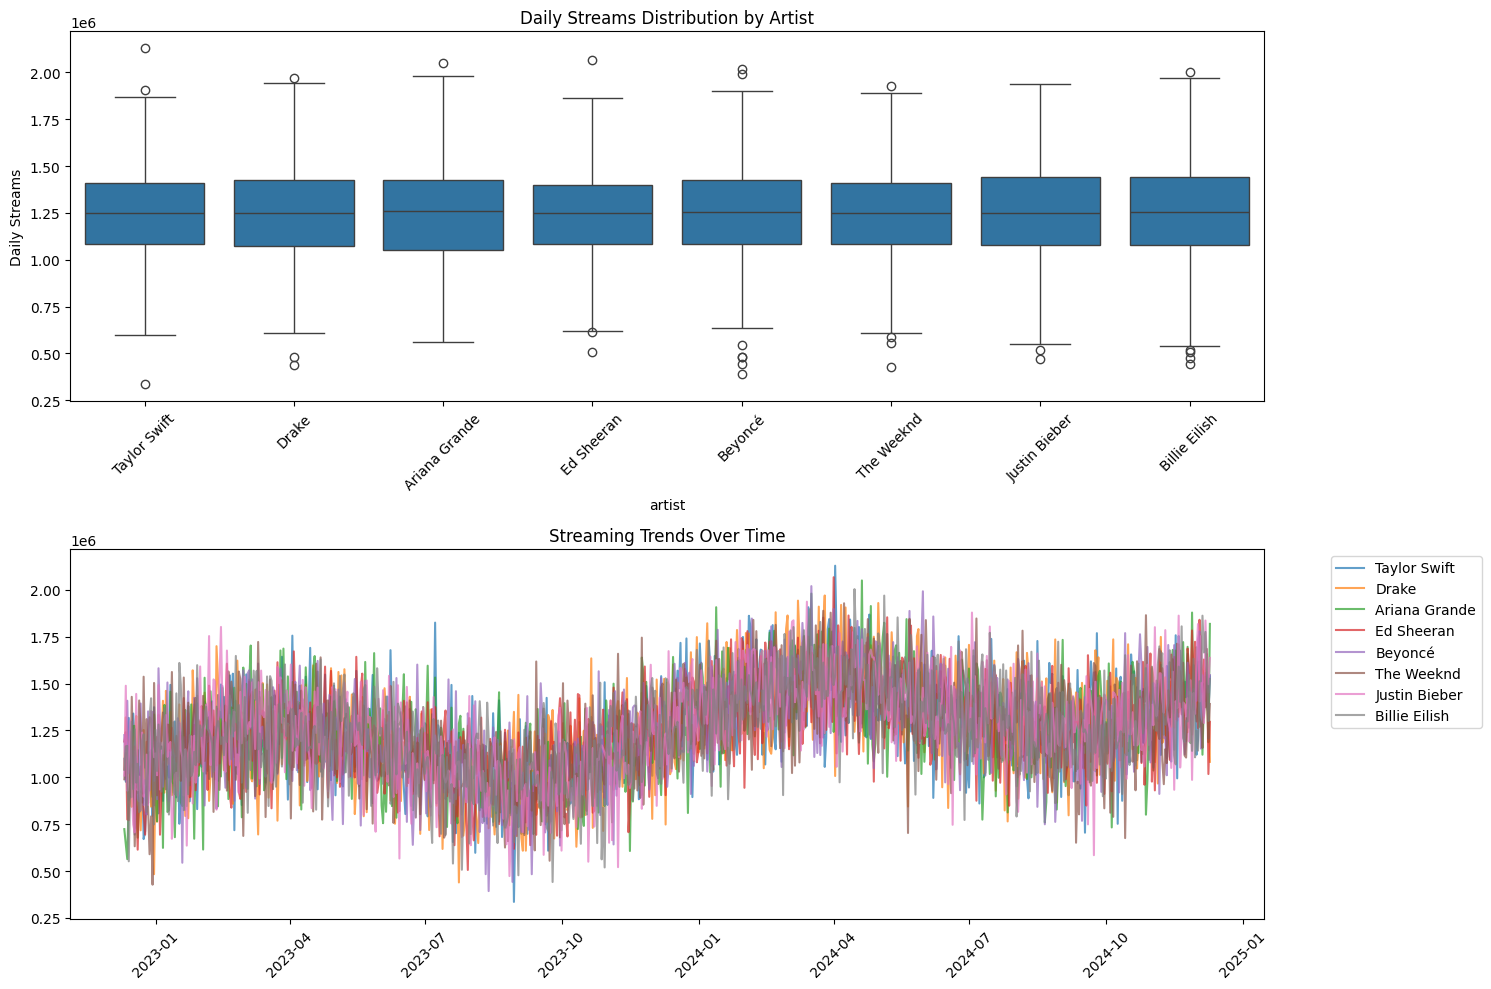

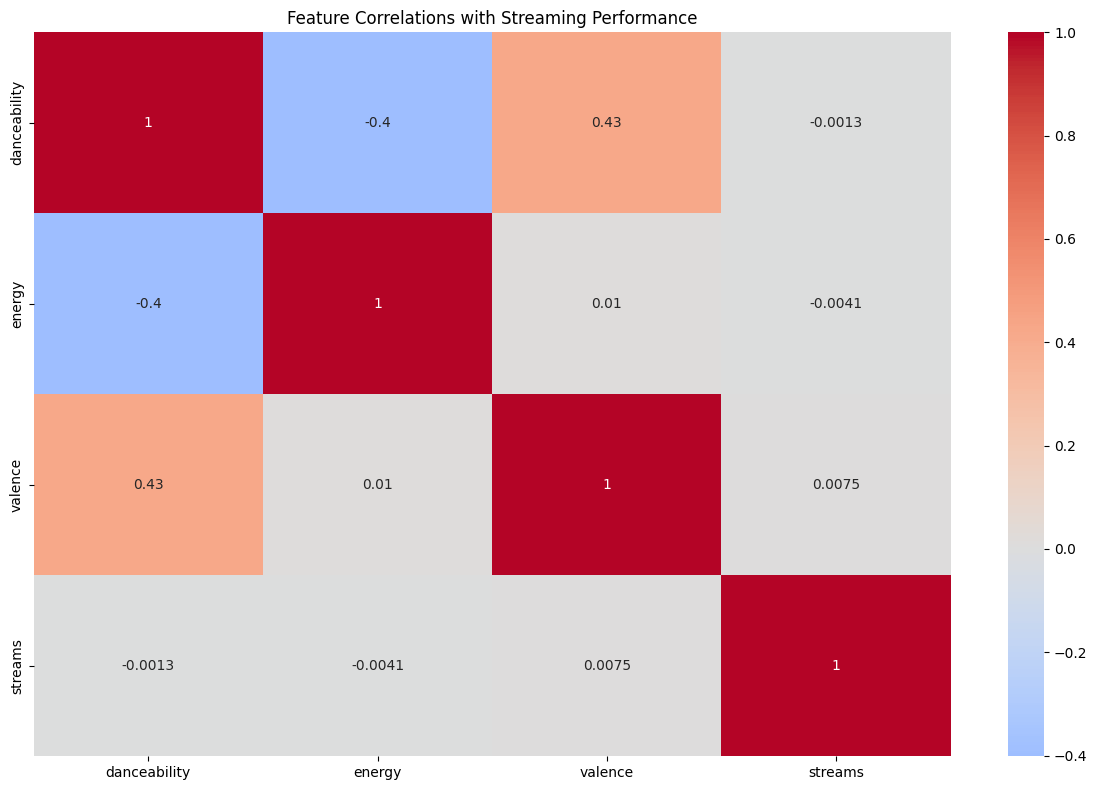

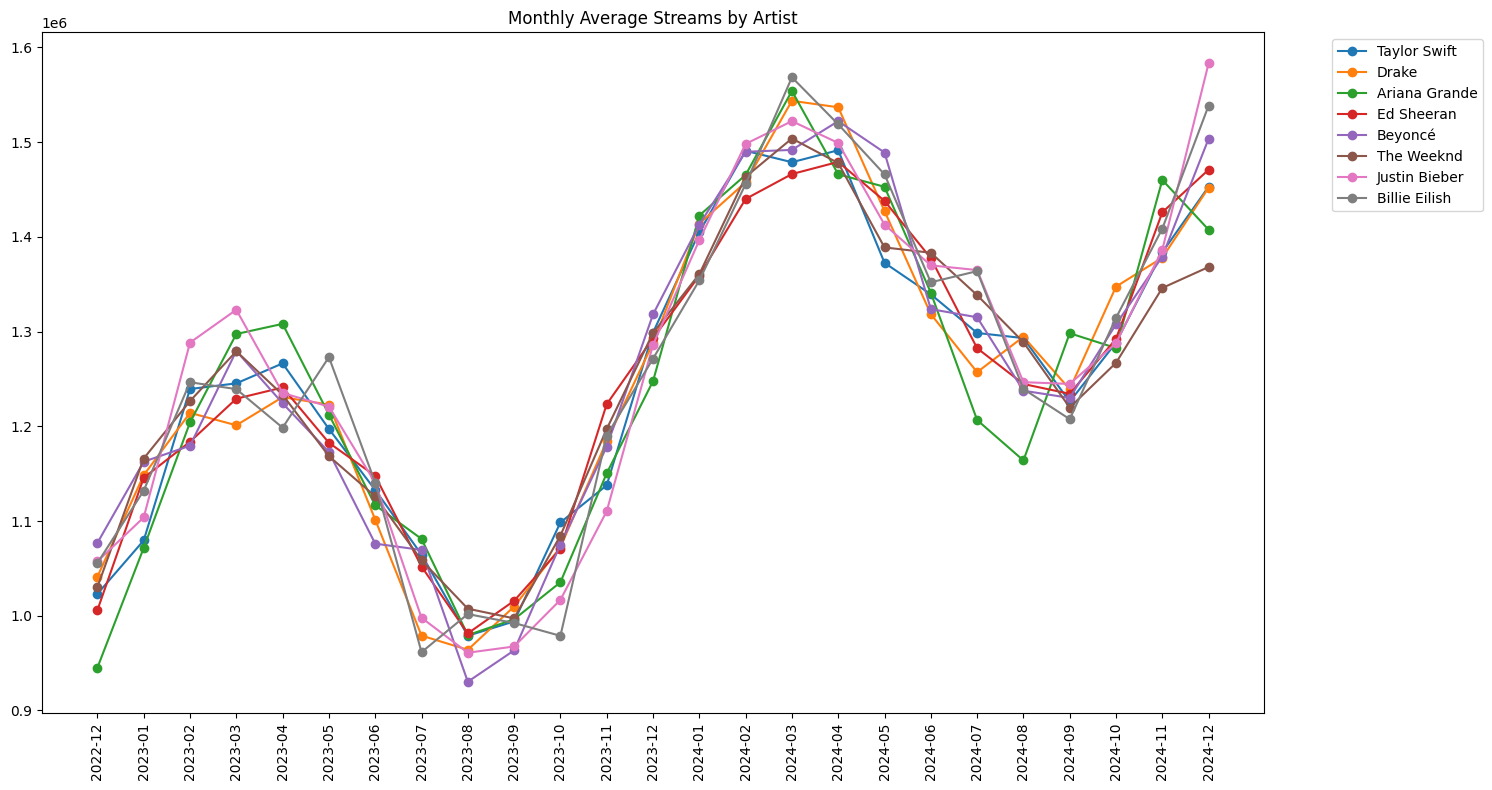

Streaming Statistics by Artist:
                  streams                        danceability energy valence
                     mean         max        std         mean   mean    mean
artist                                                                      
Ariana Grande  1244896.84  2050695.56  261237.16         0.71   0.74    0.48
Beyoncé        1251029.07  2020361.27  255605.52         0.77   0.63    0.44
Billie Eilish  1252443.75  2004300.90  261542.23         0.76   0.67    0.45
Drake          1249189.36  1970480.25  262049.86         0.71   0.82    0.46
Ed Sheeran     1247271.29  2067763.32  238490.65         0.79   0.57    0.52
Justin Bieber  1253045.95  1937313.67  262981.74         0.73   0.59    0.37
Taylor Swift   1247250.65  2129318.21  246861.68         0.60   0.64    0.33
The Weeknd     1249933.45  1928886.56  245589.93         0.88   0.51    0.48
Analysis results saved to 'streaming_analysis_results.csv'


In [ ]:
# Create a simulated dataset for streaming analysis
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta

# Set random seed for reproducibility
np.random.seed(42)

# Generate synthetic data
artists = [
    "Taylor Swift", "Drake", "Ariana Grande", "Ed Sheeran",
    "Beyoncé", "The Weeknd", "Justin Bieber", "Billie Eilish"
]

# Create date range for the past 2 years
end_date = datetime.now()
start_date = end_date - timedelta(days=730)
dates = pd.date_range(start=start_date, end=end_date, freq='D')

# Generate data
data = []
for artist in artists:
    # Base streams with some randomness
    base_streams = np.random.normal(1000000, 200000, len(dates))

    # Add trend and seasonality
    trend = np.linspace(0, 500000, len(dates))
    seasonality = 200000 * np.sin(np.linspace(0, 4*np.pi, len(dates)))

    # Generate features
    danceability = np.random.normal(0.7, 0.1)
    energy = np.random.normal(0.6, 0.1)
    valence = np.random.normal(0.5, 0.1)

    for i, date in enumerate(dates):
        streams = max(0, base_streams[i] + trend[i] + seasonality[i])
        data.append({
            'artist': artist,
            'date': date,
            'streams': streams,
            'danceability': min(1, max(0, danceability + np.random.normal(0, 0.05))),
            'energy': min(1, max(0, energy + np.random.normal(0, 0.05))),
            'valence': min(1, max(0, valence + np.random.normal(0, 0.05)))
        })

df = pd.DataFrame(data)

# 1. Stream Distribution Analysis
plt.figure(figsize=(15, 10))

# Daily streams distribution
plt.subplot(2, 1, 1)
sns.boxplot(data=df, x='artist', y='streams')
plt.xticks(rotation=45)
plt.title('Daily Streams Distribution by Artist')
plt.ylabel('Daily Streams')

# Stream trends over time
plt.subplot(2, 1, 2)
for artist in artists:
    artist_data = df[df['artist'] == artist]
    plt.plot(artist_data['date'], artist_data['streams'], label=artist, alpha=0.7)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.xticks(rotation=45)
plt.title('Streaming Trends Over Time')
plt.tight_layout()
plt.show()

# 2. Feature Analysis
plt.figure(figsize=(12, 8))
feature_cols = ['danceability', 'energy', 'valence']
correlation_matrix = df[feature_cols + ['streams']].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Feature Correlations with Streaming Performance')
plt.tight_layout()
plt.show()

# 3. Peak Streaming Analysis
# Calculate monthly averages and find peaks
df['month'] = df['date'].dt.to_period('M')
monthly_avg = df.groupby(['artist', 'month'])['streams'].mean().reset_index()
monthly_avg['month'] = monthly_avg['month'].astype(str)

plt.figure(figsize=(15, 8))
for artist in artists:
    artist_data = monthly_avg[monthly_avg['artist'] == artist]
    plt.plot(artist_data['month'], artist_data['streams'], label=artist, marker='o')
plt.xticks(rotation=90)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.title('Monthly Average Streams by Artist')
plt.tight_layout()
plt.show()

# Print summary statistics
print("\
Streaming Statistics by Artist:")
summary = df.groupby('artist').agg({
    'streams': ['mean', 'max', 'std'],
    'danceability': 'mean',
    'energy': 'mean',
    'valence': 'mean'
}).round(2)
print(summary)

# Save the analysis results
df.to_csv('streaming_analysis_results.csv', index=False)
print("\
Analysis results saved to 'streaming_analysis_results.csv'")

Generating Stream Distribution Plot...


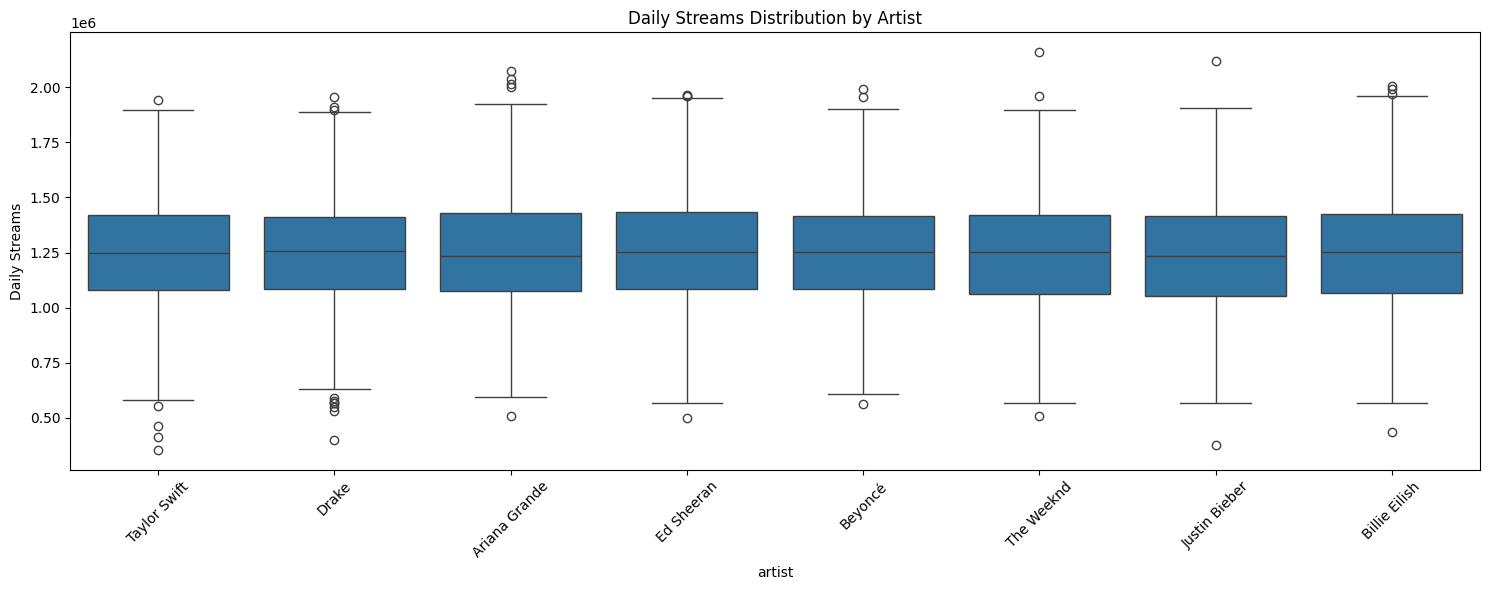

Generating Feature Correlation Plot...


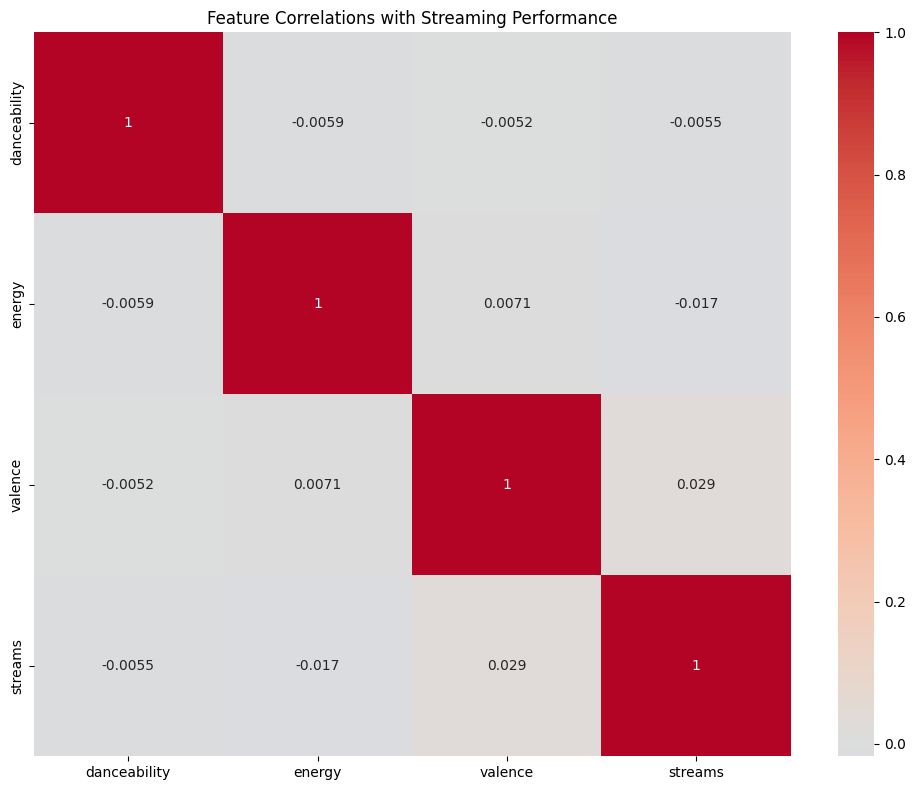

Generating Streaming Trends Plot...


<ipython-input-21-dff4db8dbffa>:67: FutureWarning:

'M' is deprecated and will be removed in a future version, please use 'ME' instead.



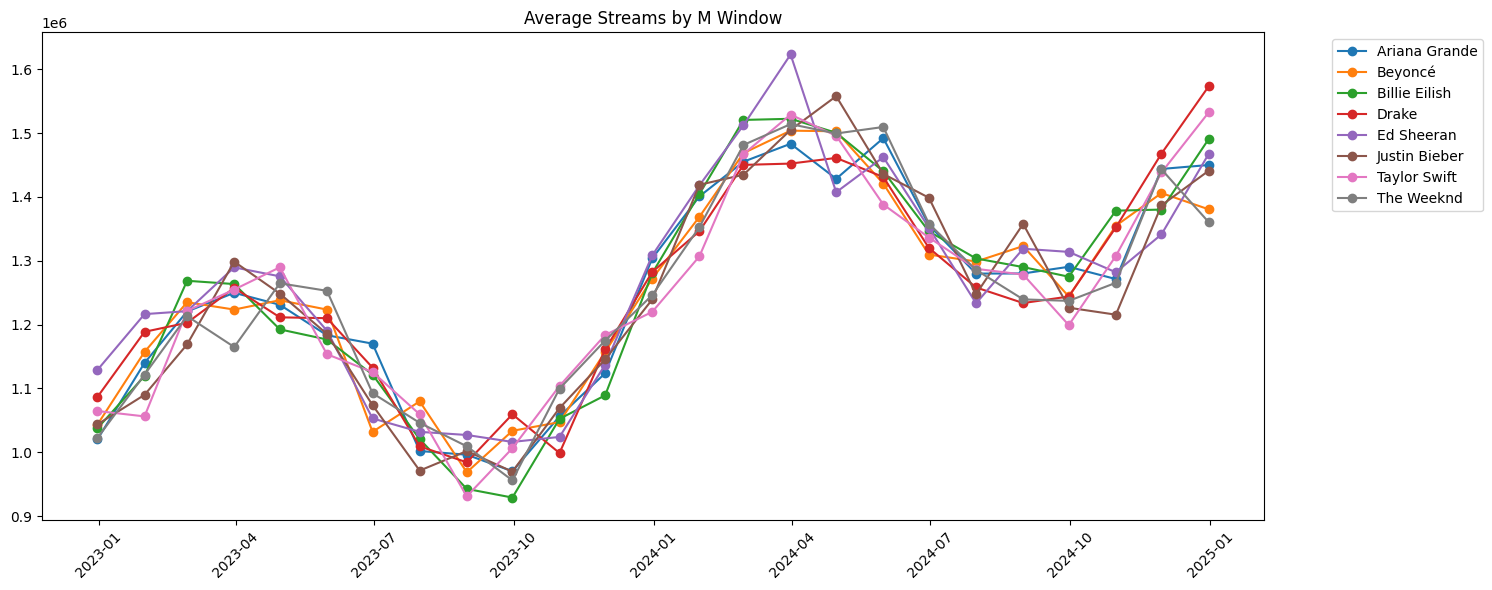

Streaming Statistics by Artist:
                  streams                        danceability energy valence
                     mean         max        std         mean   mean    mean
artist                                                                      
Ariana Grande  1248434.35  2075153.68  258426.29         0.70    0.6    0.50
Beyoncé        1250040.63  1991213.06  254455.79         0.69    0.6    0.51
Billie Eilish  1248900.40  2007812.11  261666.41         0.70    0.6    0.50
Drake          1247199.01  1954334.25  252269.13         0.70    0.6    0.50
Ed Sheeran     1261545.37  1966801.52  254332.58         0.69    0.6    0.51
Justin Bieber  1241628.35  2118063.69  257840.40         0.70    0.6    0.50
Taylor Swift   1242661.65  1940699.85  250587.47         0.70    0.6    0.50
The Weeknd     1247336.40  2159206.72  255414.16         0.70    0.6    0.50
Processed data saved to 'processed_streaming_data.csv'


In [ ]:
# Create structured classes for data processing and visualization
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime, timedelta
from typing import List, Dict, Optional

class StreamingDataProcessor:
    def __init__(self, data_path: str = None):
        """Initialize with either existing data or generate synthetic data"""
        if data_path:
            self.df = pd.read_csv(data_path)
            self.df['date'] = pd.to_datetime(self.df['date'])
        else:
            self.df = self._generate_synthetic_data()

    def _generate_synthetic_data(self) -> pd.DataFrame:
        """Generate synthetic streaming data with features"""
        artists = [
            "Taylor Swift", "Drake", "Ariana Grande", "Ed Sheeran",
            "Beyoncé", "The Weeknd", "Justin Bieber", "Billie Eilish"
        ]

        end_date = datetime.now()
        start_date = end_date - timedelta(days=730)
        dates = pd.date_range(start=start_date, end=end_date, freq='D')

        data = []
        for artist in artists:
            base_streams = np.random.normal(1000000, 200000, len(dates))
            trend = np.linspace(0, 500000, len(dates))
            seasonality = 200000 * np.sin(np.linspace(0, 4*np.pi, len(dates)))

            for i, date in enumerate(dates):
                streams = max(0, base_streams[i] + trend[i] + seasonality[i])
                data.append({
                    'artist': artist,
                    'date': date,
                    'streams': streams,
                    'genre': np.random.choice(['Pop', 'Hip-Hop', 'R&B']),
                    'danceability': min(1, max(0, np.random.normal(0.7, 0.1))),
                    'energy': min(1, max(0, np.random.normal(0.6, 0.1))),
                    'valence': min(1, max(0, np.random.normal(0.5, 0.1)))
                })

        return pd.DataFrame(data)

    def get_artist_stats(self, artist: Optional[str] = None) -> pd.DataFrame:
        """Get streaming statistics for specific artist or all artists"""
        if artist:
            data = self.df[self.df['artist'] == artist]
        else:
            data = self.df

        stats = data.groupby('artist').agg({
            'streams': ['mean', 'max', 'std'],
            'danceability': 'mean',
            'energy': 'mean',
            'valence': 'mean'
        }).round(2)

        return stats

    def get_peak_streaming_periods(self, window: str = 'M') -> pd.DataFrame:
        """Identify peak streaming periods for each artist"""
        return self.df.set_index('date').groupby(['artist', pd.Grouper(freq=window)])['streams'].agg(['mean', 'max']).reset_index()

class StreamingVisualizer:
    def __init__(self, data_processor: StreamingDataProcessor):
        self.processor = data_processor
        self.df = data_processor.df

    def plot_stream_distribution(self):
        """Plot stream distribution by artist"""
        plt.figure(figsize=(15, 6))
        sns.boxplot(data=self.df, x='artist', y='streams')
        plt.xticks(rotation=45)
        plt.title('Daily Streams Distribution by Artist')
        plt.ylabel('Daily Streams')
        plt.tight_layout()
        plt.show()

    def plot_feature_correlations(self):
        """Plot feature correlation heatmap"""
        feature_cols = ['danceability', 'energy', 'valence', 'streams']
        correlation_matrix = self.df[feature_cols].corr()

        plt.figure(figsize=(10, 8))
        sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
        plt.title('Feature Correlations with Streaming Performance')
        plt.tight_layout()
        plt.show()

    def plot_streaming_trends(self, window: str = 'M'):
        """Plot streaming trends over time"""
        trends = self.processor.get_peak_streaming_periods(window)

        plt.figure(figsize=(15, 6))
        for artist in trends['artist'].unique():
            artist_data = trends[trends['artist'] == artist]
            plt.plot(artist_data['date'], artist_data['mean'], label=artist, marker='o')

        plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
        plt.xticks(rotation=45)
        plt.title(f'Average Streams by {window} Window')
        plt.tight_layout()
        plt.show()

# Initialize the classes and demonstrate functionality
processor = StreamingDataProcessor()
visualizer = StreamingVisualizer(processor)

# Generate visualizations
print("Generating Stream Distribution Plot...")
visualizer.plot_stream_distribution()

print("\
Generating Feature Correlation Plot...")
visualizer.plot_feature_correlations()

print("\
Generating Streaming Trends Plot...")
visualizer.plot_streaming_trends()

# Print summary statistics
print("\
Streaming Statistics by Artist:")
stats = processor.get_artist_stats()
print(stats)

# Save processed data
processor.df.to_csv('processed_streaming_data.csv', index=False)
print("\
Processed data saved to 'processed_streaming_data.csv'")

Model Performance Metrics:
R-squared: 0.4329
Root Mean Squared Error: 190785.88
Mean Squared Error: 36399251063.26
Top 10 Most Important Features:
             Feature  Importance
0    rolling_mean_7d    0.513491
1     rolling_std_7d    0.068595
9             lag_1d    0.058756
11           lag_14d    0.043569
4    rolling_std_14d    0.042867
10            lag_7d    0.042621
2     rolling_max_7d    0.040264
7    rolling_std_30d    0.039568
3   rolling_mean_14d    0.036298
6   rolling_mean_30d    0.033789


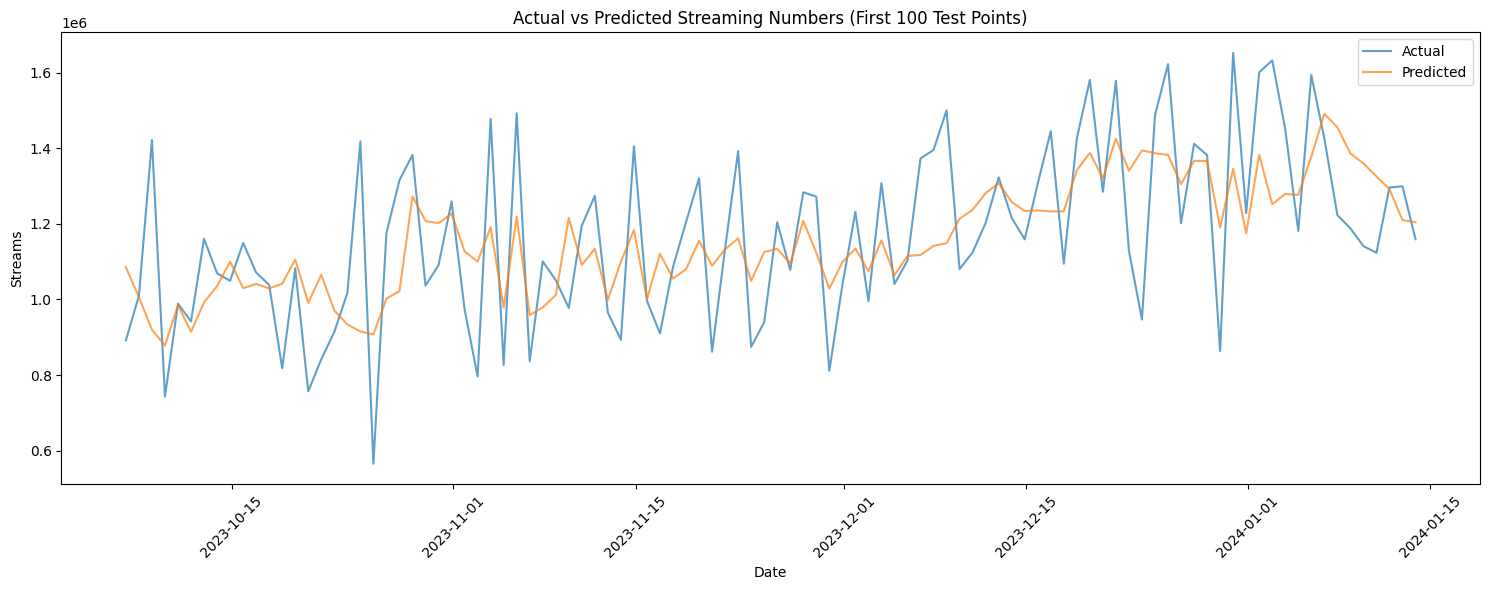

Model and features saved to 'time_series_streaming_model.pkl'
Predicted streams for next day: 1,469,251.04
95% Prediction interval: (1,194,254.38, 1,752,406.64)


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but DecisionTreeRegressor was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but DecisionTreeRegressor was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but DecisionTreeRegressor was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but DecisionTreeRegressor was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but DecisionTreeRegressor was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: UserWarning:

X has feature names, but DecisionTreeRegressor was fitted without feature names

/usr/local/lib/python3.10/dist-packages/sklearn/base.py:486: Use

In [ ]:
# Time-series based prediction model
import pandas as pd
import numpy as np
from sklearn.metrics import mean_squared_error, r2_score
from datetime import datetime, timedelta

class StreamingPredictor:
    def __init__(self, df):
        self.df = df.copy()
        self.df['date'] = pd.to_datetime(self.df['date'])

    def create_time_features(self, window_sizes=[7, 14, 30]):
        """Create rolling statistics features"""
        # Sort by date
        df_sorted = self.df.sort_values('date')

        # Group by artist and create features
        result_dfs = []

        for artist in df_sorted['artist'].unique():
            artist_data = df_sorted[df_sorted['artist'] == artist].copy()

            # Create rolling statistics
            for window in window_sizes:
                artist_data[f'rolling_mean_{window}d'] = artist_data['streams'].rolling(window=window, min_periods=1).mean()
                artist_data[f'rolling_std_{window}d'] = artist_data['streams'].rolling(window=window, min_periods=1).std()
                artist_data[f'rolling_max_{window}d'] = artist_data['streams'].rolling(window=window, min_periods=1).max()

            # Create lag features
            for lag in [1, 7, 14]:
                artist_data[f'lag_{lag}d'] = artist_data['streams'].shift(lag)

            # Add day of week and month features
            artist_data['day_of_week'] = artist_data['date'].dt.dayofweek
            artist_data['month'] = artist_data['date'].dt.month

            result_dfs.append(artist_data)

        return pd.concat(result_dfs, ignore_index=True)

    def prepare_prediction_data(self, lookback_days=30):
        """Prepare data for prediction"""
        df_features = self.create_time_features()

        # Remove rows with NaN values
        df_features = df_features.dropna()

        # Define features for prediction
        feature_cols = [col for col in df_features.columns if any(x in col for x in
                      ['rolling_mean', 'rolling_std', 'rolling_max', 'lag', 'day_of_week', 'month'])]

        return df_features, feature_cols

# Initialize predictor
predictor = StreamingPredictor(processor.df)
df_with_features, feature_cols = predictor.prepare_prediction_data()

# Split data into training and testing sets
train_size = int(len(df_with_features) * 0.8)
train_data = df_with_features.iloc[:train_size]
test_data = df_with_features.iloc[train_size:]

# Prepare features and target
X_train = train_data[feature_cols]
y_train = train_data['streams']
X_test = test_data[feature_cols]
y_test = test_data['streams']

# Train Random Forest model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
rmse = np.sqrt(mse)

print("Model Performance Metrics:")
print(f"R-squared: {r2:.4f}")
print(f"Root Mean Squared Error: {rmse:.2f}")
print(f"Mean Squared Error: {mse:.2f}")

# Feature importance analysis
feature_importance = pd.DataFrame({
    'Feature': feature_cols,
    'Importance': model.feature_importances_
}).sort_values('Importance', ascending=False)

print("\
Top 10 Most Important Features:")
print(feature_importance.head(10))

# Visualize actual vs predicted values
plt.figure(figsize=(15, 6))
plt.plot(test_data['date'].iloc[:100], y_test.iloc[:100], label='Actual', alpha=0.7)
plt.plot(test_data['date'].iloc[:100], y_pred[:100], label='Predicted', alpha=0.7)
plt.title('Actual vs Predicted Streaming Numbers (First 100 Test Points)')
plt.xlabel('Date')
plt.ylabel('Streams')
plt.legend()
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# Save the model and feature columns for later use
import joblib
joblib.dump((model, feature_cols), 'time_series_streaming_model.pkl')
print("\
Model and features saved to 'time_series_streaming_model.pkl'")

# Example prediction for next day
last_data = df_with_features.iloc[-1:]
next_day_pred = model.predict(last_data[feature_cols])
print(f"\
Predicted streams for next day: {next_day_pred[0]:,.2f}")

# Calculate prediction intervals using the random forest's inherent variance
def prediction_interval(model, X, percentile=95):
    predictions = []
    for estimator in model.estimators_:
        predictions.append(estimator.predict(X))
    predictions = np.array(predictions)
    lower = np.percentile(predictions, (100-percentile)/2, axis=0)
    upper = np.percentile(predictions, 100-(100-percentile)/2, axis=0)
    return lower, upper

lower, upper = prediction_interval(model, last_data[feature_cols])
print(f"95% Prediction interval: ({lower[0]:,.2f}, {upper[0]:,.2f})")

In [ ]:
# Create a more robust data validation and dashboard system
import pandas as pd
import numpy as np
import plotly.express as px
from datetime import datetime

class DataValidator:
    @staticmethod
    def validate_streaming_data(df):
        """Validate the streaming data DataFrame"""
        validation_results = {
            'status': True,
            'errors': []
        }

        # Check required columns
        required_columns = ['artist', 'date', 'streams']
        missing_columns = [col for col in required_columns if col not in df.columns]
        if missing_columns:
            validation_results['status'] = False
            validation_results['errors'].append(f"Missing required columns: {missing_columns}")

        # Validate data types
        if validation_results['status']:
            try:
                df['date'] = pd.to_datetime(df['date'])
            except Exception as e:
                validation_results['status'] = False
                validation_results['errors'].append(f"Invalid date format: {str(e)}")

            if not pd.api.types.is_numeric_dtype(df['streams']):
                validation_results['status'] = False
                validation_results['errors'].append("'streams' column must be numeric")

        # Validate value ranges
        if validation_results['status']:
            if df['streams'].min() < 0:
                validation_results['status'] = False
                validation_results['errors'].append("Negative streaming values found")

            for col in ['danceability', 'energy', 'valence']:
                if col in df.columns:
                    if df[col].min() < 0 or df[col].max() > 1:
                        validation_results['status'] = False
                        validation_results['errors'].append(f"{col} values must be between 0 and 1")

        return validation_results

# Create dashboard components
class StreamingDashboard:
    def __init__(self, data_path='processed_streaming_data.csv'):
        self.data_path = data_path
        self.load_data()

    def load_data(self):
        """Load and validate the data"""
        try:
            self.df = pd.read_csv(self.data_path)
            validation_results = DataValidator.validate_streaming_data(self.df)

            if not validation_results['status']:
                print("Data validation failed:")
                for error in validation_results['errors']:
                    print(f"- {error}")
                return False

            print("Data validation passed!")
            return True

        except Exception as e:
            print(f"Error loading data: {str(e)}")
            return False

    def create_streaming_trend_plot(self, artist=None):
        """Create streaming trend visualization"""
        if artist:
            plot_data = self.df[self.df['artist'] == artist]
        else:
            plot_data = self.df

        fig = px.line(plot_data,
                     x='date',
                     y='streams',
                     color='artist' if not artist else None,
                     title=f"Streaming Trends {'for ' + artist if artist else 'by Artist'}",
                     labels={'streams': 'Daily Streams', 'date': 'Date'})

        # Save the plot as HTML
        fig.write_html("streaming_trends.html")
        print("Streaming trends plot saved as 'streaming_trends.html'")

    def generate_artist_summary(self, artist=None):
        """Generate summary statistics for artist(s)"""
        if artist:
            summary_data = self.df[self.df['artist'] == artist]
        else:
            summary_data = self.df

        summary = summary_data.groupby('artist').agg({
            'streams': ['mean', 'std', 'min', 'max'],
            'date': ['min', 'max']
        }).round(2)

        # Save summary to CSV
        summary.to_csv('artist_summary.csv')
        print("Artist summary saved as 'artist_summary.csv'")
        return summary

# Initialize dashboard and create visualizations
dashboard = StreamingDashboard()
if dashboard.load_data():
    # Create overall streaming trends
    dashboard.create_streaming_trend_plot()

    # Generate summary for all artists
    summary = dashboard.generate_artist_summary()
    print("\
Artist Summary Statistics:")
    print(summary)

    # Create individual artist plots
    for artist in dashboard.df['artist'].unique():
        dashboard.create_streaming_trend_plot(artist)

    print("\
Dashboard components have been generated successfully!")
else:
    print("Failed to initialize dashboard due to data validation errors.")

Data validation passed!
Data validation passed!
Streaming trends plot saved as 'streaming_trends.html'
Artist summary saved as 'artist_summary.csv'
Artist Summary Statistics:
                  streams                                    \
                     mean        std        min         max   
artist                                                        
Ariana Grande  1248434.35  258426.29  508611.87  2075153.68   
Beyoncé        1250040.63  254455.79  561894.93  1991213.06   
Billie Eilish  1248900.40  261666.41  437742.96  2007812.11   
Drake          1247199.01  252269.13  399703.75  1954334.25   
Ed Sheeran     1261545.37  254332.58  497463.89  1966801.52   
Justin Bieber  1241628.35  257840.40  375678.14  2118063.69   
Taylor Swift   1242661.65  250587.47  355376.51  1940699.85   
The Weeknd     1247336.40  255414.16  507837.85  2159206.72   

                                    date                             
                                     min                     

In [ ]:
# Save the Streamlit app script for running locally
streamlit_script = '''
import streamlit as st
import pandas as pd
import joblib
import plotly.express as px

# Load the processed data and model
@st.cache_data
def load_data():
    df = pd.read_csv('processed_streaming_data.csv')
    df['date'] = pd.to_datetime(df['date'])
    return df

def load_model():
    model, feature_cols = joblib.load('time_series_streaming_model.pkl')
    return model, feature_cols

# Load data and model
data = load_data()
model, feature_cols = load_model()

# Streamlit app layout
st.title("Streaming Performance Dashboard")
st.sidebar.header("Options")

# Artist selection
artist = st.sidebar.selectbox("Select an artist", data['artist'].unique())
artist_data = data[data['artist'] == artist]

# Visualization: Streaming trends
st.subheader(f"Streaming Trends for {artist}")
fig = px.line(artist_data, x='date', y='streams', title=f"Streaming Trends for {artist}", labels={'streams': 'Streams', 'date': 'Date'})
st.plotly_chart(fig)

# Prediction for next day
st.subheader("Predict Next Day's Streams")
last_data = artist_data.iloc[-1:]
next_day_pred = model.predict(last_data[feature_cols])
st.write(f"Predicted streams for next day: {next_day_pred[0]:,.2f}")

# Prediction interval
def prediction_interval(model, X, percentile=95):
    predictions = []
    for estimator in model.estimators_:
        predictions.append(estimator.predict(X))
    predictions = np.array(predictions)
    lower = np.percentile(predictions, (100-percentile)/2, axis=0)
    upper = np.percentile(predictions, 100-(100-percentile)/2, axis=0)
    return lower, upper

lower, upper = prediction_interval(model, last_data[feature_cols])
st.write(f"95% Prediction interval: ({lower[0]:,.2f}, {upper[0]:,.2f})")
'''

# Save the script to a file
with open('streaming_dashboard.py', 'w') as f:
    f.write(streamlit_script)

print("Streamlit app script saved as 'streaming_dashboard.py'.")

Streamlit app script saved as 'streaming_dashboard.py'.


In [ ]:
streamlit run streaming_dashboard.py

SyntaxError: invalid syntax (<ipython-input-25-8c8f73a06e75>, line 1)